In [44]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

# import library preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# model selection
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm

In [5]:
dv = pd.read_csv('data/voice.csv')

dv.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### 1. Klasifikasi Menggunakan SVM

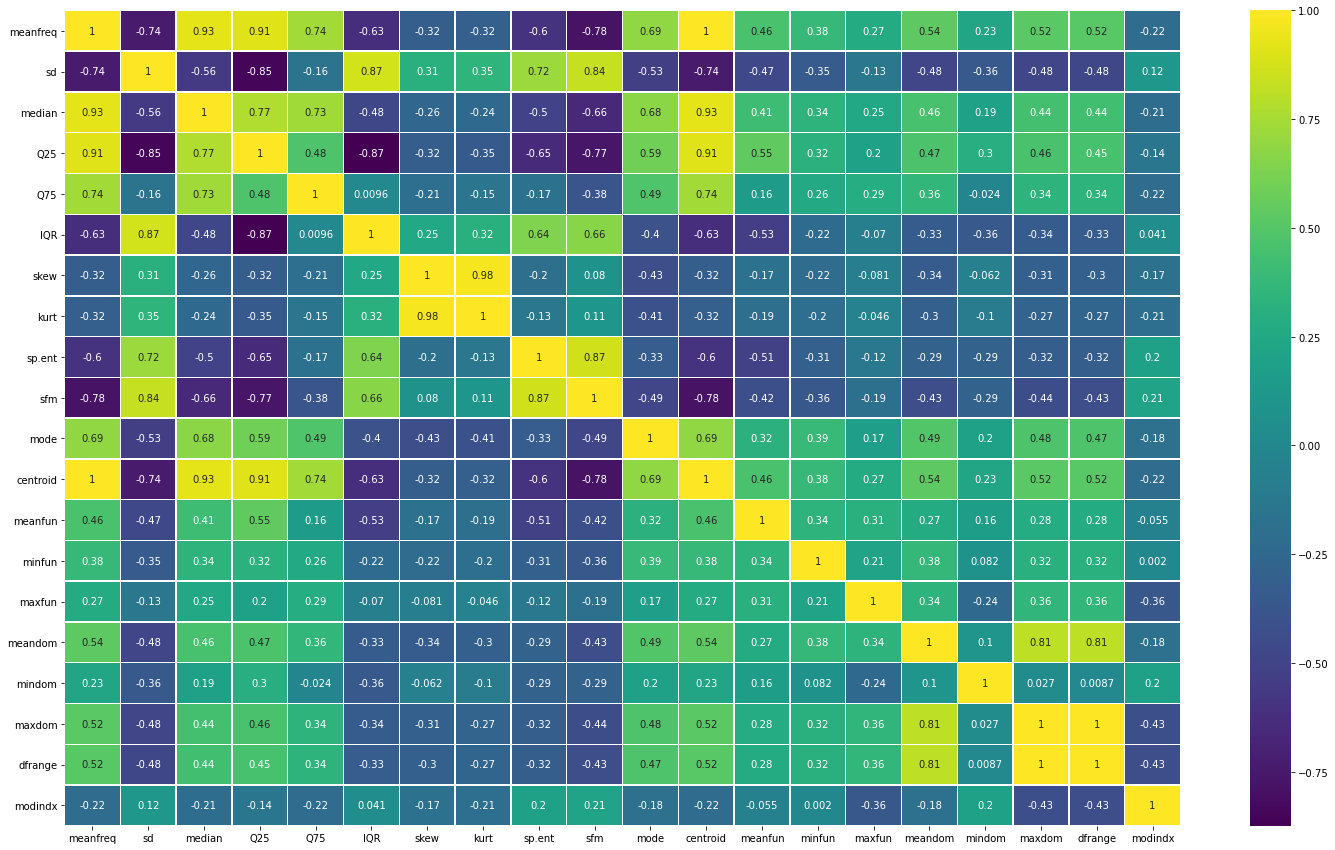

In [11]:
#visualiasi heatmap data
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(dv.corr(), annot=True, linewidths=0.5,cmap='viridis')
plt.show()

In [13]:
# Memisahkan fitur dan label
X = dv.drop('label', axis=1)  # Fitur
y = dv['label']              # Label

# Membagi Data menjadi Data Latih dan Data Uji:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menskalakan Fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Inisialisasi Model SVM
svm_classifier = SVC(kernel='linear', C=1)

# Latih Model SVM
svm_classifier.fit(X_train, y_train)

# Evaluasi Model
y_pred = svm_classifier.predict(X_test)

# Akurasi
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9763406940063092


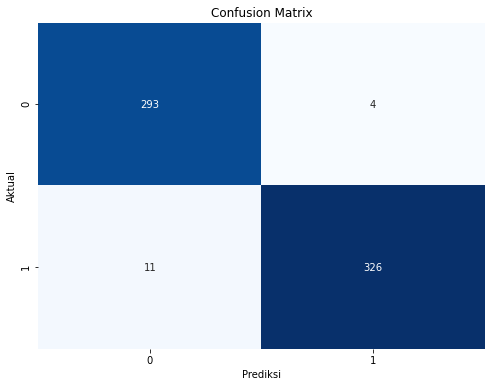

              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [19]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Report Klasifikasi
print(metrics.classification_report(y_test, y_pred))

### 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
####    a. Menggunakan data spam.csv
####    b. Fitur CountVectorizer dengan mengaktifkan stop_words
####    c. Evaluasi hasilnya

In [20]:
ds = pd.read_csv('data/spam.csv')

ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
# Membuang kolom atau data yang tidak digunakan
ds = ds.drop(ds.iloc[:,2:], axis=1)
ds.head()


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
ds = ds.rename(columns=new_cols)

# cek data
ds.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
ds['Labels'] = ds['Labels'].map(new_labels)

# Cek data
ds.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
# Memisahkan fitur dan label
X = ds['SMS'].values # Fitur
y = ds['Labels'].values # Label

# Membagi Data menjadi Data Latih dan Data Uji:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan konfigurasi CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



In [43]:
# Inisialisasi model klasifikasi Multinomial Naive Bayes
mnb_classifier = MultinomialNB()

# Fit model
mnb_classifier.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb_classifier.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb_classifier.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

# Laporan Klasifikasi
classification_rep = metrics.classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)


Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9838565022421525
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### 3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
####    a. Menggunakan data spam.csv
####    b. Fitur TF-IDF dengan mengaktifkan stop_words
####    c. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
####    d. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [45]:
ds = pd.read_csv('data/spam.csv')

ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [46]:
# Membuang kolom atau data yang tidak digunakan
ds = ds.drop(ds.iloc[:,2:], axis=1)
ds.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
# Rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
ds = ds.rename(columns=new_cols)

# cek data
ds.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
ds['Labels'] = ds['Labels'].map(new_labels)

# Cek data
ds.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
# Memisahkan fitur dan label
X = ds['SMS'].values # Fitur
y = ds['Labels'].values # Label

# Membagi Data menjadi Data Latih dan Data Uji:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan konfigurasi CountVectorizer dengan stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [51]:
# Inisialisasi model klasifikasi Multinomial Naive Bayes
mnb_classifier = MultinomialNB()

# Fit model
mnb_classifier.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb_classifier.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb_classifier.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

# Laporan Klasifikasi
classification_rep = metrics.classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

Hasil akurasi data train: 0.9838456360780794
Hasil akurasi data test: 0.9668161434977578
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



CountVectorize Vs TfidVectorizer :

1. CountVetorizer :
    a. CountVectorizer menghitung frekuensi kemunculan kata dalam teks.
    b. Menghasilkan matriks yang menghitung jumlah kemunculan setiap kata dalam dokumen.
    c. Tidak memberikan bobot pada kata-kata yang muncul lebih sering.
    d. Cocok untuk tugas klasifikasi sederhana dan ketika frekuensi kemunculan kata penting.
    e. Cocok untuk data spam chat jika kata-kata yang muncul dalam spam chat cenderung berbeda dari yang muncul dalam chat normal.

2. TfidVectorizer :
    a. TfidfVectorizer memberikan bobot pada kata berdasarkan frekuensi kemunculannya dalam dokumen dan kemunculannya di seluruh korpus.
    b. Mengurangi bobot kata yang muncul secara umum di seluruh dokumen.
    c. Mengidentifikasi kata-kata yang lebih spesifik dan mungkin lebih penting dalam membedakan dokumen.
    d. Cocok untuk tugas klasifikasi kompleks dan ketika kata-kata yang lebih spesifik dan penting dalam membedakan spam chat dari chat normal.

Dari penjelasan diatas, kesimpulan saya mungkin dalam kasus spam ini lebih baik menggunakan TfidVectorizer dikarenakan dapat mengurangi bobot kata-kata umum yang muncul, sehingga memungkinkan penekanan pada kata-kata yang lebih spesifik yang mungkin menjadi ciri khas dari spam chat.